<a href="https://colab.research.google.com/github/aravindan1412/Design-1/blob/master/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the malware dataset:


Saving malware.csv to malware (3).csv
Please upload the benign dataset:


Saving benign.csv to benign (3).csv
Data types before encoding:
type            int64
hash           object
malice        float64
generic       float64
trojan        float64
ransomware    float64
worm          float64
backdoor      float64
spyware       float64
rootkit       float64
encrypter     float64
downloader    float64
dtype: object
Data types after encoding:
type            int64
hash            int64
malice        float64
generic       float64
trojan        float64
ransomware    float64
worm          float64
backdoor      float64
spyware       float64
rootkit       float64
encrypter     float64
downloader    float64
dtype: object
Introducing label noise...
Introducing feature noise...
Introducing missing values...
Imputing missing values...
Dropping predictive feature: type
Balancing the dataset using SMOTE...


<ipython-input-6-f0dbb486ca56>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[noisy_indices] = 1 - y.iloc[noisy_indices]  # Flip labels
<ipython-input-6-f0dbb486ca56>:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.05499412 -0.02786187 -0.00576143 ...  0.05174898 -0.03251731
  0.011158  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[noisy_indices, col] += np.random.normal(0, X[col].std() * 0.1, size=num_noisy_features)  # Gaussian noise
<ipython-input-6-f0dbb486ca56>:71: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 8003.11011624  2131.96930531  7786.82186785 ...  5292.93

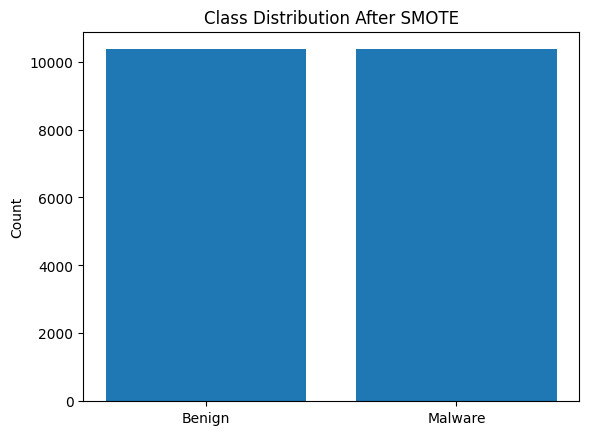

Running Random Forest for Static Analysis...
Random Forest Accuracy: 0.8960443801254221
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2102
           1       0.83      0.99      0.90      2044

    accuracy                           0.90      4146
   macro avg       0.91      0.90      0.90      4146
weighted avg       0.91      0.90      0.90      4146

Feature Importances:
Feature: malice, Importance: 0.3147
Feature: trojan, Importance: 0.2815
Feature: generic, Importance: 0.2798
Feature: encrypter, Importance: 0.0497
Feature: worm, Importance: 0.0272
Feature: downloader, Importance: 0.0253
Feature: backdoor, Importance: 0.0097
Feature: rootkit, Importance: 0.0045
Feature: ransomware, Importance: 0.0042
Feature: spyware, Importance: 0.0017
Feature: hash, Importance: 0.0017
Running XGBoost for refinement...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:09:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9462132175590932
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2102
           1       0.92      0.97      0.95      2044

    accuracy                           0.95      4146
   macro avg       0.95      0.95      0.95      4146
weighted avg       0.95      0.95      0.95      4146

Running LSTM for Dynamic Analysis...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


415/415 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7547 - loss: 0.4880 - val_accuracy: 0.8776 - val_loss: 0.3259
Epoch 2/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8726 - loss: 0.3314 - val_accuracy: 0.8752 - val_loss: 0.3206
Epoch 3/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8679 - loss: 0.3348 - val_accuracy: 0.8643 - val_loss: 0.3383
Epoch 4/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8801 - loss: 0.3148 - val_accuracy: 0.8718 - val_loss: 0.3232
Epoch 5/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8756 - loss: 0.3236 - val_accuracy: 0.8724 - val_loss: 0.3216


130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
LSTM Accuracy on Dynamic Analysis Samples: 0.8796430294259527
LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      2102
           1       0.81      0.99      0.89      2044

    accuracy                           0.88      4146
   macro avg       0.90      0.88      0.88      4146
weighted avg       0.90      0.88      0.88      4146



In [ ]:
# Install necessary libraries
!pip install xgboost tensorflow scikit-learn pandas numpy imbalanced-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Upload files using Colab's file upload widget
print("Please upload the malware dataset:")
uploaded_malware = files.upload()
malware_file_path = list(uploaded_malware.keys())[0]

print("Please upload the benign dataset:")
uploaded_benign = files.upload()
benign_file_path = list(uploaded_benign.keys())[0]

# Load datasets
malware_df = pd.read_csv(malware_file_path)
benign_df = pd.read_csv(benign_file_path)

# Add labels: 1 for malware, 0 for benign
malware_df['label'] = 1
benign_df['label'] = 0

# Combine datasets
data = pd.concat([malware_df, benign_df], axis=0).reset_index(drop=True)

# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)

# Split features and labels
X = data.drop(columns=['label'])
y = data['label']

# Handle non-numerical columns by encoding them
print("Data types before encoding:")
print(X.dtypes)

# Label encoding for non-numerical columns
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Verify all columns are numeric
print("Data types after encoding:")
print(X.dtypes)

# Introduce Label Noise
print("Introducing label noise...")
label_noise_ratio = 0.05  # 5% label noise
num_noisy_labels = int(len(y) * label_noise_ratio)
noisy_indices = np.random.choice(len(y), num_noisy_labels, replace=False)
y.iloc[noisy_indices] = 1 - y.iloc[noisy_indices]  # Flip labels

# Introduce Feature Noise
print("Introducing feature noise...")
feature_noise_ratio = 0.1  # 10% feature noise
num_noisy_features = int(len(X) * feature_noise_ratio)
for col in X.columns:
    noisy_indices = np.random.choice(len(X), num_noisy_features, replace=False)
    X.loc[noisy_indices, col] += np.random.normal(0, X[col].std() * 0.1, size=num_noisy_features)  # Gaussian noise

# Introduce Missing Values
print("Introducing missing values...")
missing_value_ratio = 0.02  # 2% missing values
num_missing_values = int(X.size * missing_value_ratio)
missing_indices = (
    np.random.randint(0, X.shape[0], size=num_missing_values),
    np.random.randint(0, X.shape[1], size=num_missing_values),
)
X.values[missing_indices] = np.nan

# Impute missing values with column means
print("Imputing missing values...")
X.fillna(X.mean(), inplace=True)

# Drop a predictive feature
if len(X.columns) > 0:
    predictive_feature = X.columns[0]  # Drop the first feature
    print(f"Dropping predictive feature: {predictive_feature}")
    X = X.drop(columns=[predictive_feature])

# Address dataset imbalance with SMOTE
print("Balancing the dataset using SMOTE...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize class distribution
plt.bar(['Benign', 'Malware'], [sum(y_resampled == 0), sum(y_resampled == 1)])
plt.title('Class Distribution After SMOTE')
plt.ylabel('Count')
plt.show()

# Split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Static Analysis with Random Forest
print("Running Random Forest for Static Analysis...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,  # Reduced depth to prevent overfitting
    min_samples_split=10,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Feature Importance
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print("Feature Importances:")
for idx in sorted_indices:
    print(f"Feature: {X.columns[idx]}, Importance: {importances[idx]:.4f}")

# XGBoost Refinement - For low-confidence samples
low_confidence_threshold = 0.8
low_confidence_indices = np.where(rf_model.predict_proba(X_test).max(axis=1) < low_confidence_threshold)[0]
if len(low_confidence_indices) > 0:
    print("Running XGBoost for refinement...")
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_predictions = xgb_model.predict(X_test)
    print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
    print("XGBoost Classification Report:")
    print(classification_report(y_test, xgb_predictions))
else:
    print("No low-confidence samples detected. Skipping XGBoost refinement...")

# Prepare data for LSTM
def reshape_for_lstm(dataframe):
    return np.expand_dims(dataframe.to_numpy(), axis=2)

X_train_lstm = reshape_for_lstm(X_train)
X_test_lstm = reshape_for_lstm(X_test)

# LSTM Model
print("Running LSTM for Dynamic Analysis...")
lstm_model = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False),
    Dropout(0.2),  # Add dropout to prevent overfitting
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate LSTM
lstm_predictions = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)
print("LSTM Accuracy on Dynamic Analysis Samples:", accuracy_score(y_test, lstm_predictions))
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_predictions))
